In [1]:
## Data Analysis
# House Data prediction

In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

pd.pandas.set_option('display.max_columns',None)

In [97]:
#loading the dataset
data=pd.read_csv('Downloads/housing_data.csv')

#print the shape of the dataset

print(data.shape)

(1460, 81)


In [98]:
data.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


# Missing Values

In [99]:
features_na=[features for features in data.columns if data[features].isnull().sum()>1]

#finding the features and the percentage of missing values

for feature in features_na:
    print(feature,np.round(data[feature].isnull().mean(),4),'%missing values')

LotFrontage 0.1774 %missing values
Alley 0.9377 %missing values
MasVnrType 0.0055 %missing values
MasVnrArea 0.0055 %missing values
BsmtQual 0.0253 %missing values
BsmtCond 0.0253 %missing values
BsmtExposure 0.026 %missing values
BsmtFinType1 0.0253 %missing values
BsmtFinType2 0.026 %missing values
FireplaceQu 0.4726 %missing values
GarageType 0.0555 %missing values
GarageYrBlt 0.0555 %missing values
GarageFinish 0.0555 %missing values
GarageQual 0.0555 %missing values
GarageCond 0.0555 %missing values
PoolQC 0.9952 %missing values
Fence 0.8075 %missing values
MiscFeature 0.963 %missing values


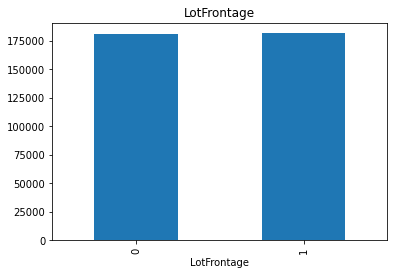

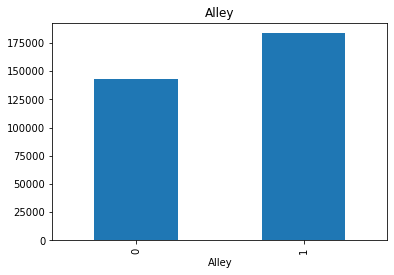

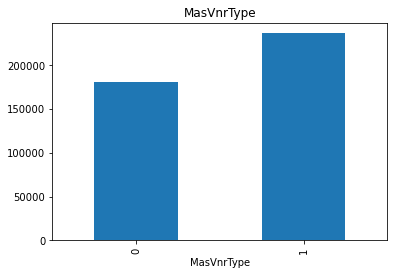

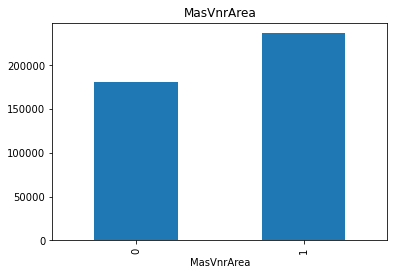

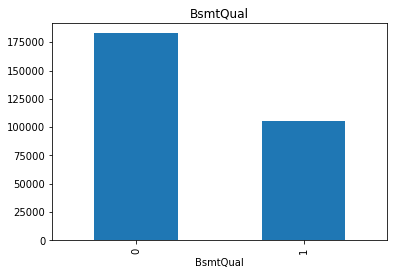

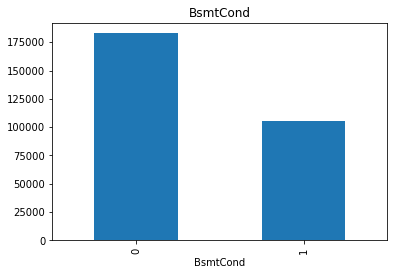

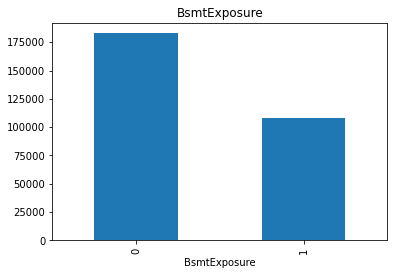

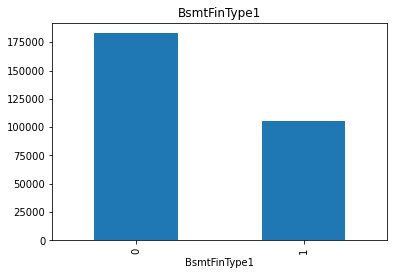

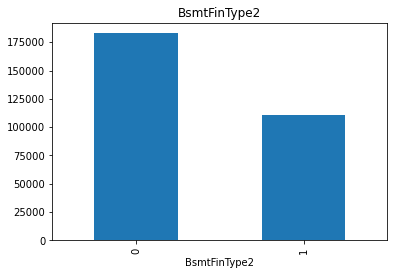

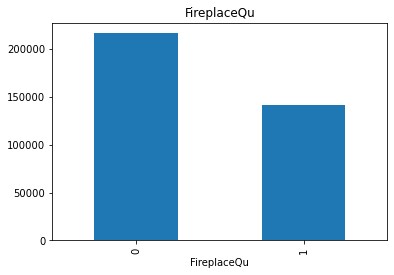

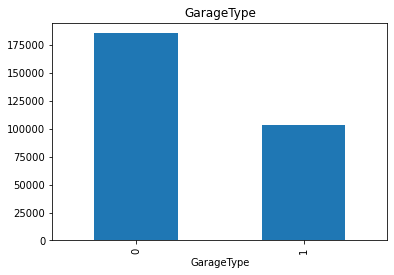

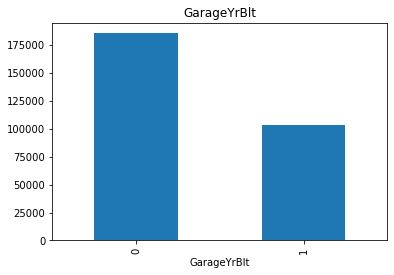

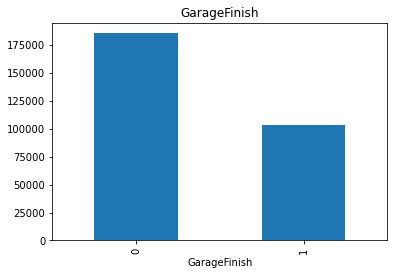

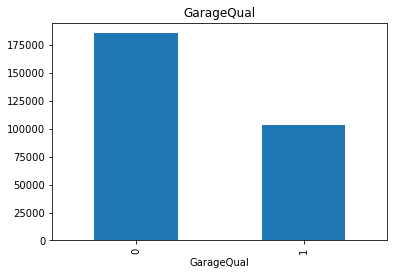

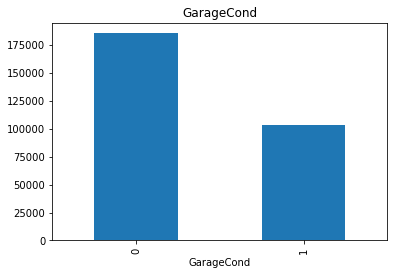

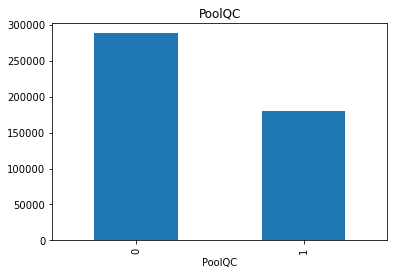

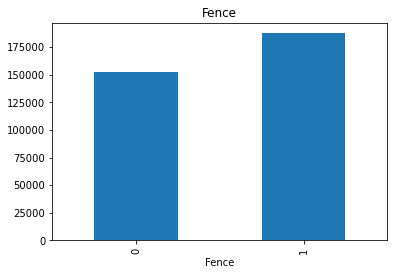

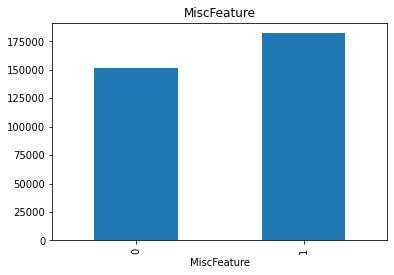

In [100]:
# finding relationship between missing values and Sales Price

for feature in features_na:
    dataset=data.copy()
    
    #Making a variable that represents 1 if the observation was missing or 0 if it was not missing
    dataset[feature]=np.where(dataset[feature].isnull(),1,0)
    
    #Lets calculate the mean SalePrice where the info is missing 
    dataset.groupby(feature)['SalePrice'].mean().plot.bar()
    plt.title(feature)
    plt.show()

# Numerical Variables

In [101]:
#list of numerical variables
numerical_features=[feature for feature in data.columns if data[feature].dtypes !='O']
print('Number of numerical variables: ',len(numerical_features))

#visualise the numerical variables
data[numerical_features].head()

Number of numerical variables:  38


,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
0,1,60,65.0,8450,7,5,2003,2003,196.0,706,0,150,856,856,854,0,1710,1,0,2,1,3,1,8,0,2003.0,2,548,0,61,0,0,0,0,0,2,2008,208500
1,2,20,80.0,9600,6,8,1976,1976,0.0,978,0,284,1262,1262,0,0,1262,0,1,2,0,3,1,6,1,1976.0,2,460,298,0,0,0,0,0,0,5,2007,181500
2,3,60,68.0,11250,7,5,2001,2002,162.0,486,0,434,920,920,866,0,1786,1,0,2,1,3,1,6,1,2001.0,2,608,0,42,0,0,0,0,0,9,2008,223500
3,4,70,60.0,9550,7,5,1915,1970,0.0,216,0,540,756,961,756,0,1717,1,0,1,0,3,1,7,1,1998.0,3,642,0,35,272,0,0,0,0,2,2006,140000
4,5,60,84.0,14260,8,5,2000,2000,350.0,655,0,490,1145,1145,1053,0,2198,1,0,2,1,4,1,9,1,2000.0,3,836,192,84,0,0,0,0,0,12,2008,250000


In [102]:
#List of variables having DateTime feature

year_feature=[feature for feature in numerical_features if 'Yr' in feature or 'Year' in feature]

year_feature

['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold']

In [103]:
#Fetching the content of the year variables

for feature in year_feature:
    print(feature,data[feature].unique())

YearBuilt [2003 1976 2001 1915 2000 1993 2004 1973 1931 1939 1965 2005 1962 2006
 1960 1929 1970 1967 1958 1930 2002 1968 2007 1951 1957 1927 1920 1966
 1959 1994 1954 1953 1955 1983 1975 1997 1934 1963 1981 1964 1999 1972
 1921 1945 1982 1998 1956 1948 1910 1995 1991 2009 1950 1961 1977 1985
 1979 1885 1919 1990 1969 1935 1988 1971 1952 1936 1923 1924 1984 1926
 1940 1941 1987 1986 2008 1908 1892 1916 1932 1918 1912 1947 1925 1900
 1980 1989 1992 1949 1880 1928 1978 1922 1996 2010 1946 1913 1937 1942
 1938 1974 1893 1914 1906 1890 1898 1904 1882 1875 1911 1917 1872 1905]
YearRemodAdd [2003 1976 2002 1970 2000 1995 2005 1973 1950 1965 2006 1962 2007 1960
 2001 1967 2004 2008 1997 1959 1990 1955 1983 1980 1966 1963 1987 1964
 1972 1996 1998 1989 1953 1956 1968 1981 1992 2009 1982 1961 1993 1999
 1985 1979 1977 1969 1958 1991 1971 1952 1975 2010 1984 1986 1994 1988
 1954 1957 1951 1978 1974]
GarageYrBlt [2003. 1976. 2001. 1998. 2000. 1993. 2004. 1973. 1931. 1939. 1965. 2005.
 1962. 2006.

Text(0, 0.5, 'Median House Price')

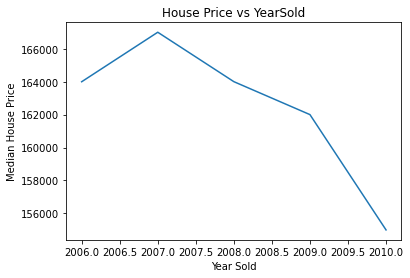

In [104]:
#Finding relationship between the year the house was sold and Saleprice

data.groupby('YrSold')['SalePrice'].median().plot()
plt.title('House Price vs YearSold')
plt.xlabel('Year Sold')
plt.ylabel('Median House Price')

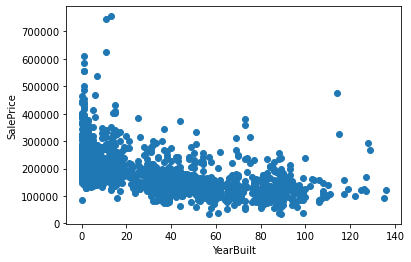

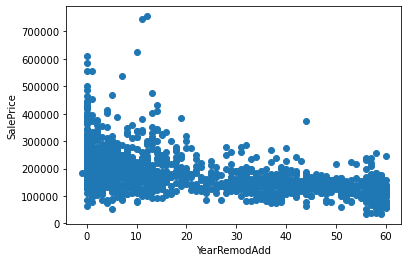

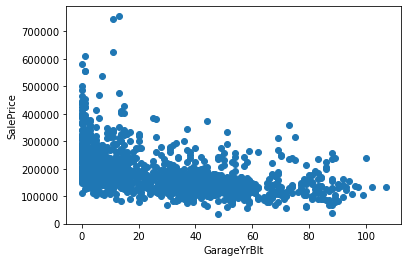

In [105]:
#Comparing the diff between all years features with Sale Price

for feature in year_feature:
    if feature!='YrSold':
        data=data.copy()
        data[feature]=data['YrSold']-data[feature]
        
        plt.scatter(data[feature],data['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.show()

In [106]:
#finding the discrete features

discrete_features=[feature for feature in numerical_features if len(data[feature].unique())<25 and feature not in year_feature+['Id']]
print('Discrete Variable count: {}'.format(len(discrete_features)))

Discrete Variable count: 17


In [107]:
discrete_features

['MSSubClass',
 'OverallQual',
 'OverallCond',
 'LowQualFinSF',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'TotRmsAbvGrd',
 'Fireplaces',
 'GarageCars',
 '3SsnPorch',
 'PoolArea',
 'MiscVal',
 'MoSold']

In [108]:
data[discrete_features].head()

,MSSubClass,OverallQual,OverallCond,LowQualFinSF,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageCars,3SsnPorch,PoolArea,MiscVal,MoSold
0,60,7,5,0,1,0,2,1,3,1,8,0,2,0,0,0,2
1,20,6,8,0,0,1,2,0,3,1,6,1,2,0,0,0,5
2,60,7,5,0,1,0,2,1,3,1,6,1,2,0,0,0,9
3,70,7,5,0,1,0,1,0,3,1,7,1,3,0,0,0,2
4,60,8,5,0,1,0,2,1,4,1,9,1,3,0,0,0,12


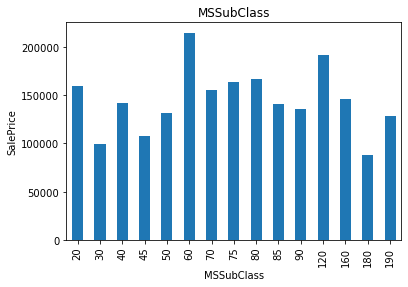

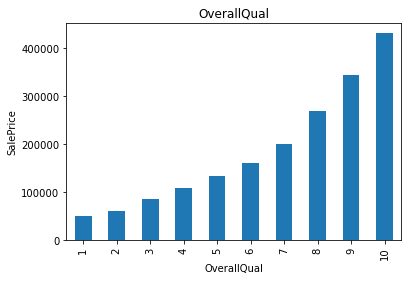

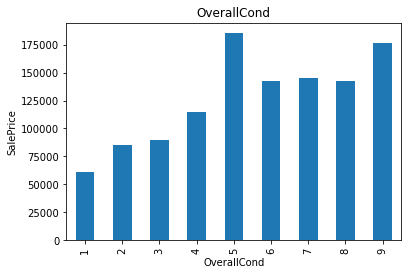

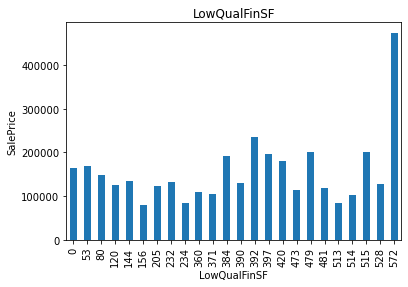

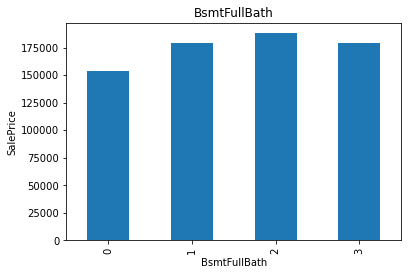

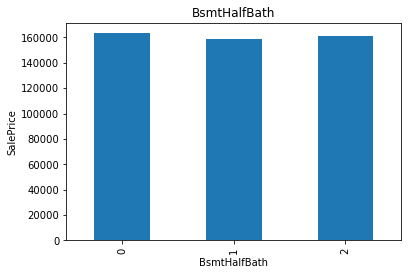

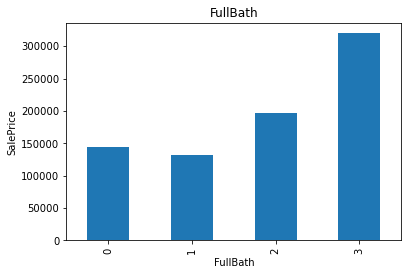

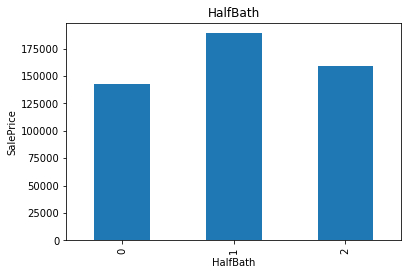

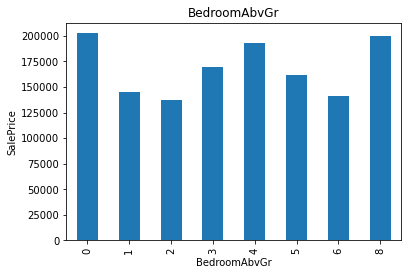

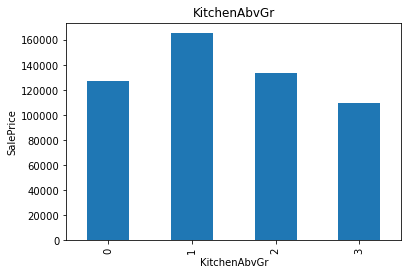

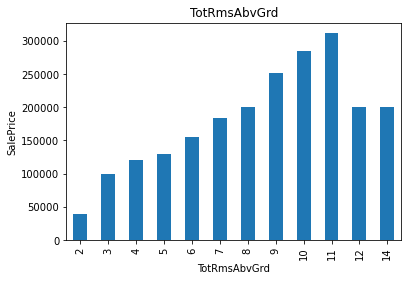

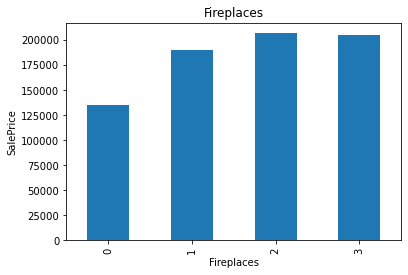

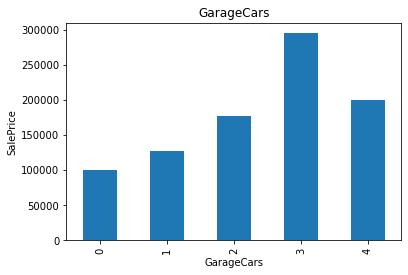

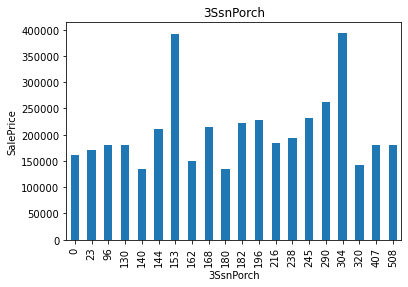

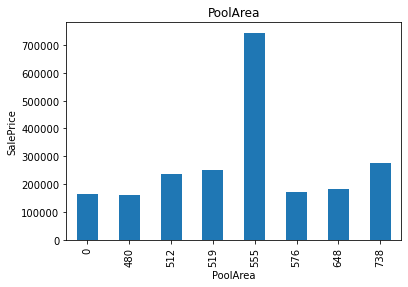

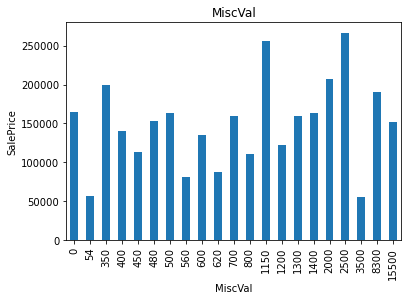

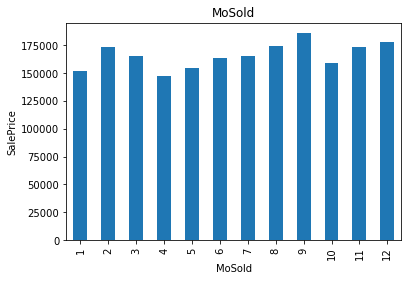

In [109]:
#finding the relationship between them and sale Price

for feature in discrete_features:
    data=data.copy()
    data.groupby(feature)['SalePrice'].median().plot.bar()
    plt.ylabel('SalePrice')
    plt.xlabel(feature)
    plt.title(feature)
    plt.show()

In [110]:
#finding the continuous variable

continuous_feature=[feature for feature in numerical_features if feature not in discrete_features+year_feature+['Id']]

print('Continuous variable count: {}'.format(len(continuous_feature)))

Continuous variable count: 16


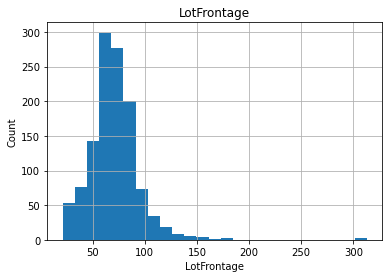

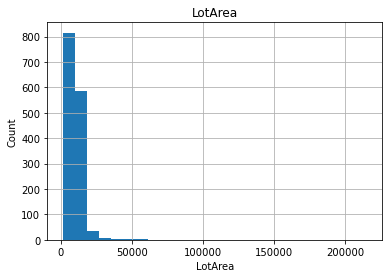

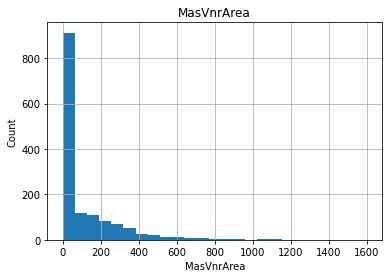

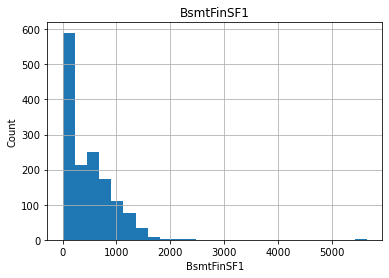

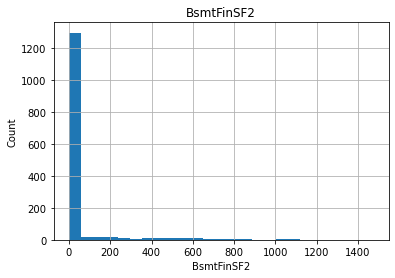

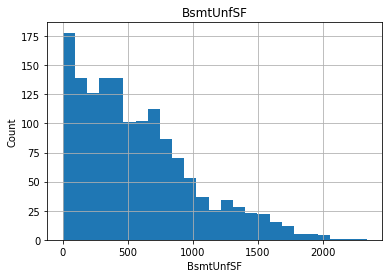

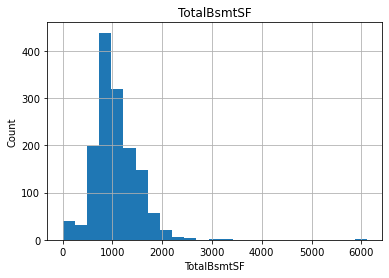

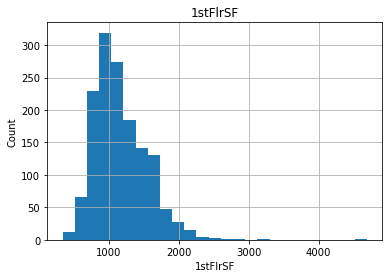

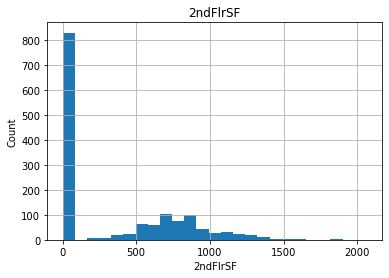

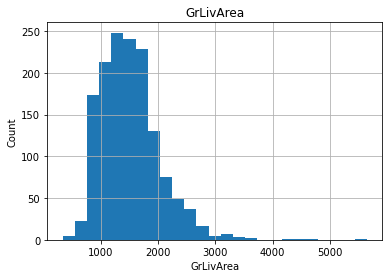

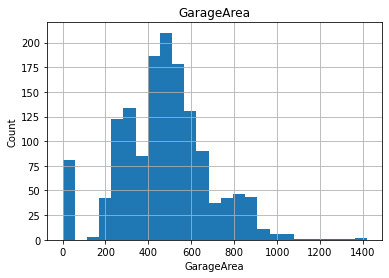

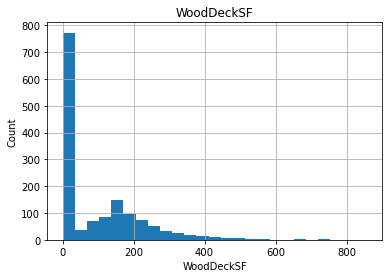

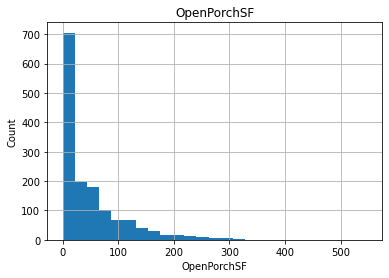

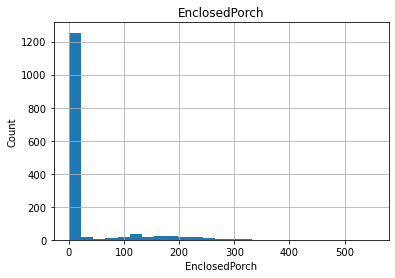

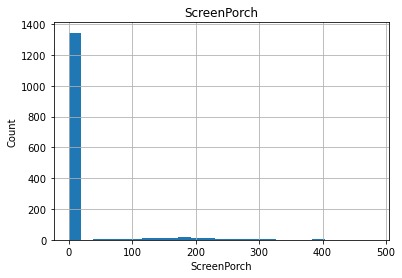

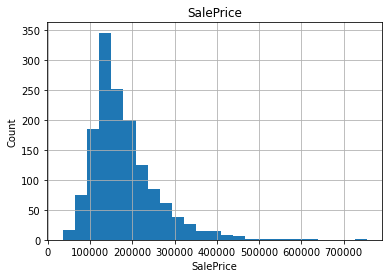

In [111]:
#Analyzing the continuous variable by histograms

for feature in continuous_feature:
    data=data.copy()
    data[feature].hist(bins=25)
    plt.xlabel(feature)
    plt.ylabel('Count')
    plt.title(feature)
    plt.show()

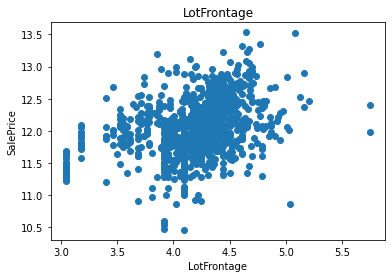

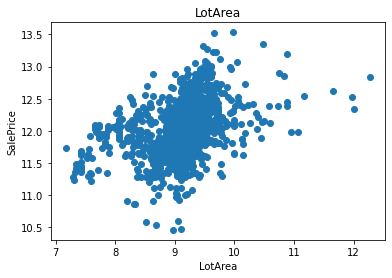

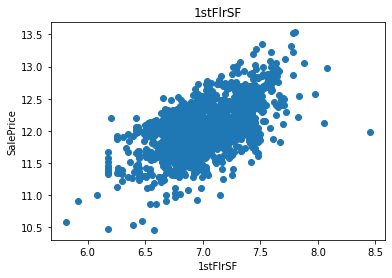

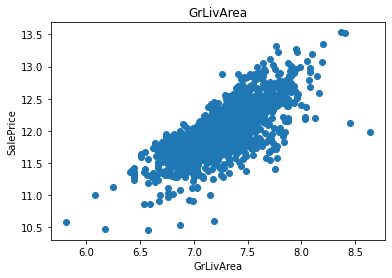

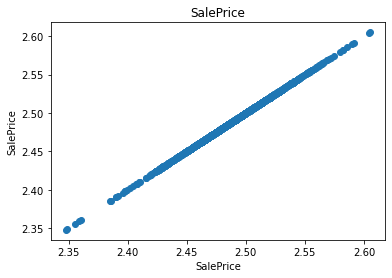

In [112]:
#Using logarithmic transformation

for feature in continuous_feature:
    dataset=data.copy()
    if 0 in dataset[feature].unique():
        pass
    else:
        dataset[feature]=np.log(dataset[feature])
        dataset['SalePrice']=np.log(dataset['SalePrice'])
        plt.scatter(dataset[feature],dataset['SalePrice'])
        plt.xlabel(feature)
        plt.ylabel('SalePrice')
        plt.title(feature)
        plt.show()

# outliers

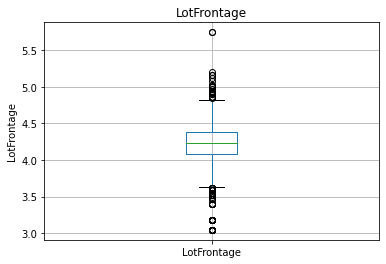

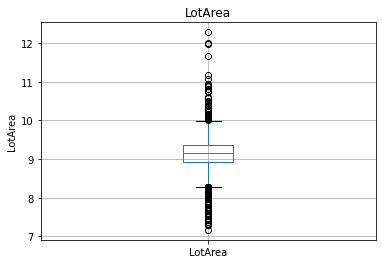

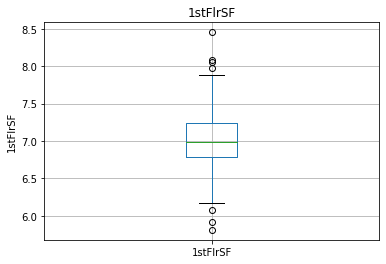

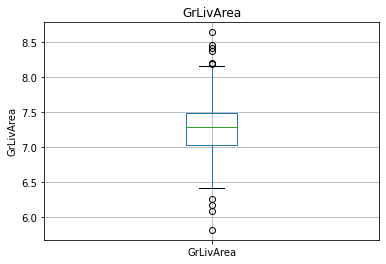

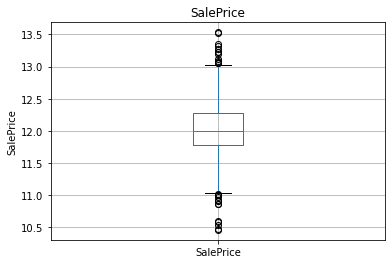

In [113]:
for feature in continuous_feature:
    data=data.copy()
    if 0 in data[feature].unique():
        pass
    else:
        data[feature]=np.log(data[feature])
        data.boxplot(column=feature)
        plt.ylabel(feature)
        plt.title(feature)
        plt.show()

##Categorical Variables

In [114]:
categorical_features=[feature for feature in data.columns if data[feature].dtypes=='O']
categorical_features

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [115]:
data[categorical_features].head()

,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinType2,Heating,HeatingQC,CentralAir,Electrical,KitchenQual,Functional,FireplaceQu,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
0,RL,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,No,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,NaN,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
1,RL,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,Gable,CompShg,MetalSd,MetalSd,None,TA,TA,CBlock,Gd,TA,Gd,ALQ,Unf,GasA,Ex,Y,SBrkr,TA,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
2,RL,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Mn,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal
3,RL,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,Gable,CompShg,Wd Sdng,Wd Shng,None,TA,TA,BrkTil,TA,Gd,No,ALQ,Unf,GasA,Gd,Y,SBrkr,Gd,Typ,Gd,Detchd,Unf,TA,TA,Y,NaN,NaN,NaN,WD,Abnorml
4,RL,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,Gable,CompShg,VinylSd,VinylSd,BrkFace,Gd,TA,PConc,Gd,TA,Av,GLQ,Unf,GasA,Ex,Y,SBrkr,Gd,Typ,TA,Attchd,RFn,TA,TA,Y,NaN,NaN,NaN,WD,Normal


In [116]:
for feature in categorical_features:
    print('the feature is {} and no.of categories are {}'.format(feature,len(data[feature].unique())))

the feature is MSZoning and no.of categories are 5
the feature is Street and no.of categories are 2
the feature is Alley and no.of categories are 3
the feature is LotShape and no.of categories are 4
the feature is LandContour and no.of categories are 4
the feature is Utilities and no.of categories are 2
the feature is LotConfig and no.of categories are 5
the feature is LandSlope and no.of categories are 3
the feature is Neighborhood and no.of categories are 25
the feature is Condition1 and no.of categories are 9
the feature is Condition2 and no.of categories are 8
the feature is BldgType and no.of categories are 5
the feature is HouseStyle and no.of categories are 8
the feature is RoofStyle and no.of categories are 6
the feature is RoofMatl and no.of categories are 8
the feature is Exterior1st and no.of categories are 15
the feature is Exterior2nd and no.of categories are 16
the feature is MasVnrType and no.of categories are 5
the feature is ExterQual and no.of categories are 4
the fea

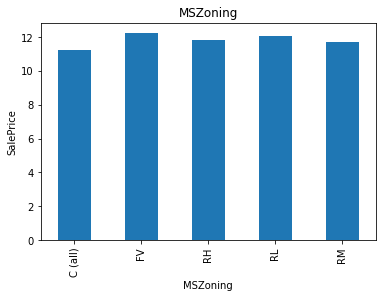

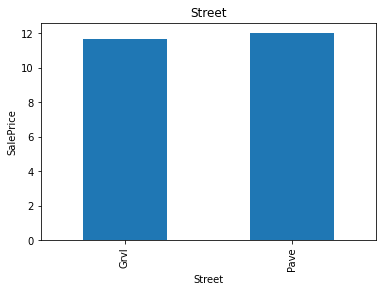

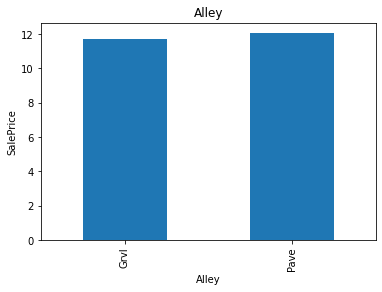

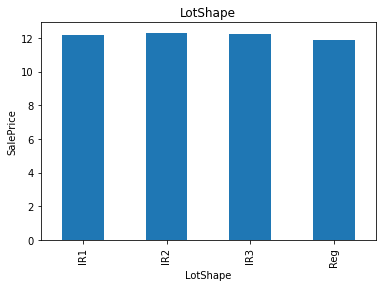

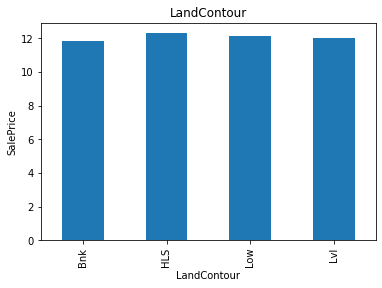

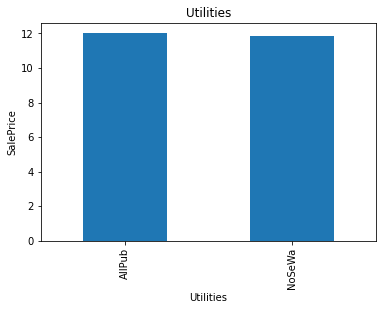

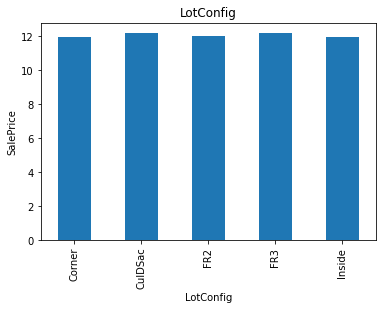

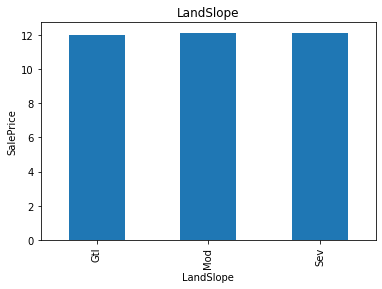

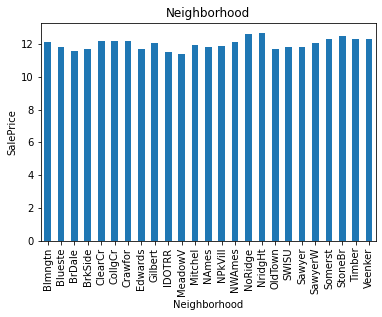

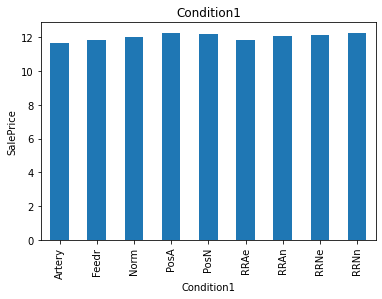

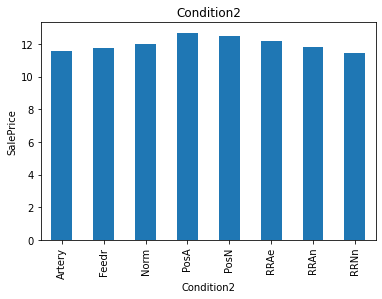

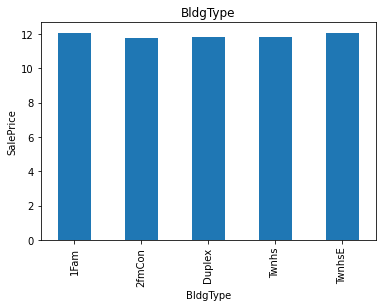

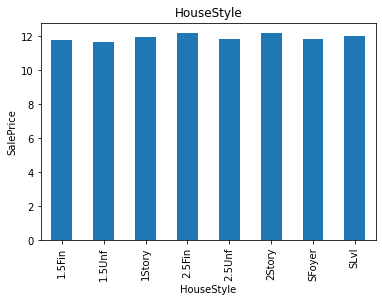

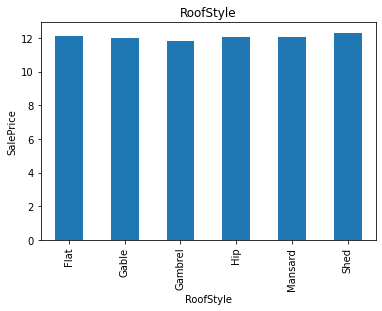

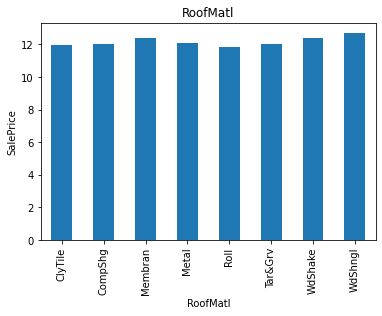

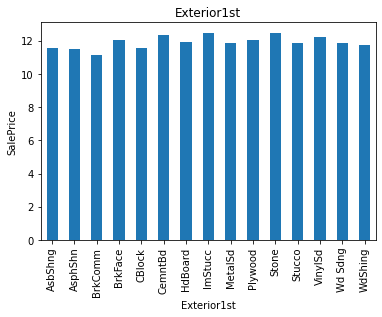

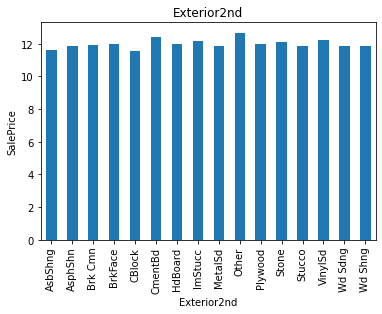

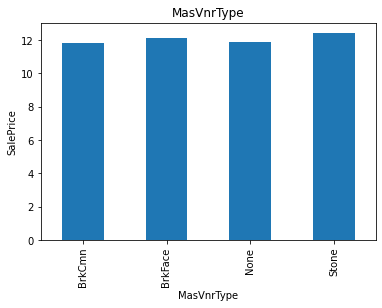

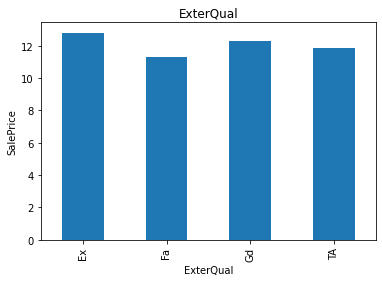

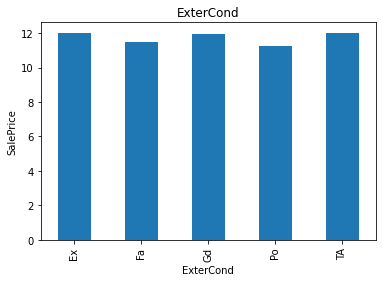

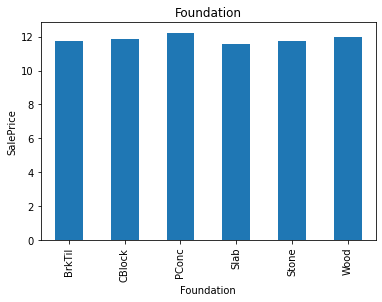

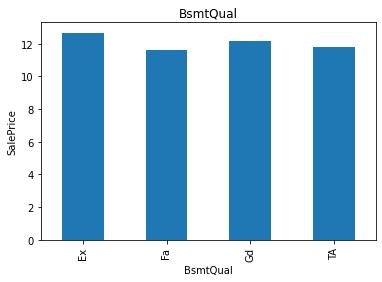

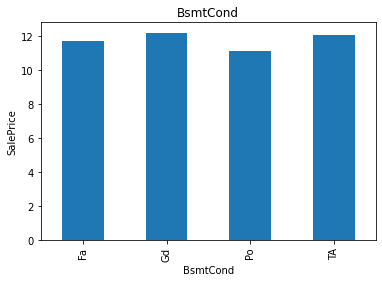

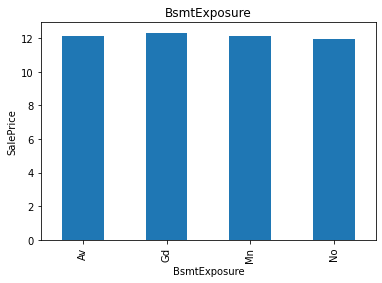

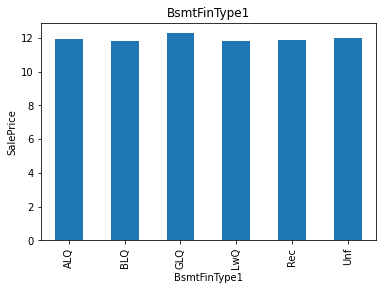

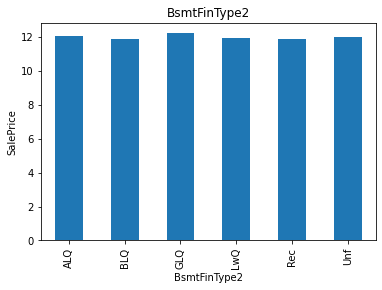

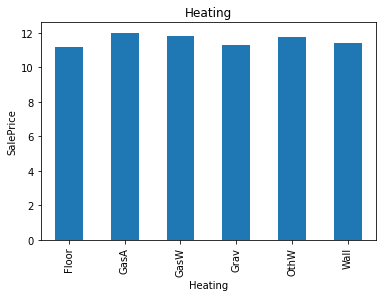

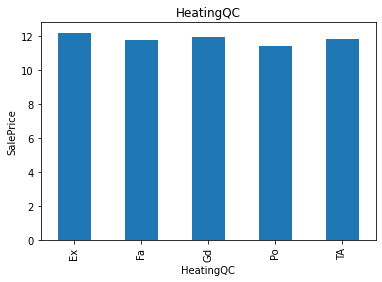

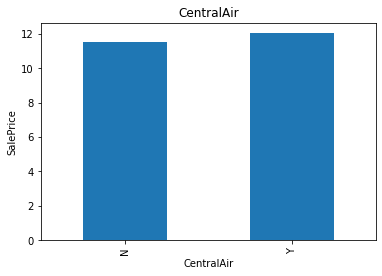

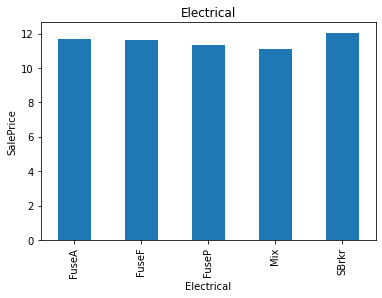

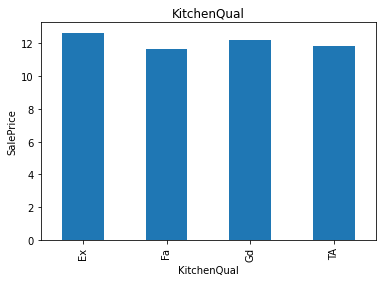

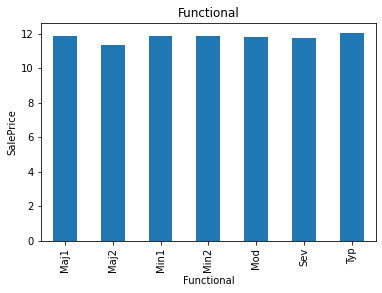

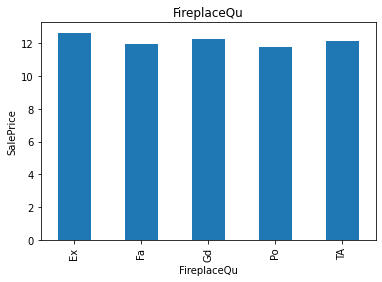

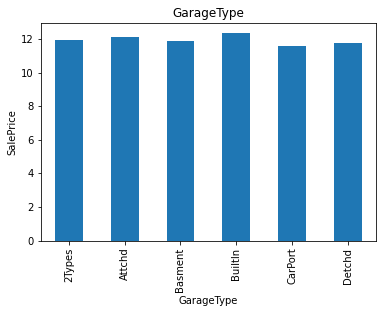

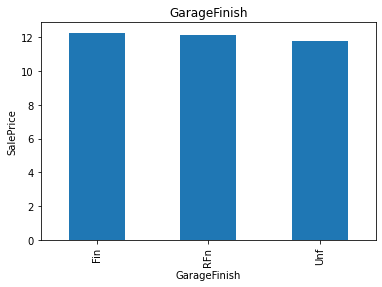

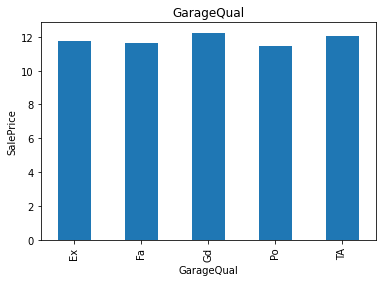

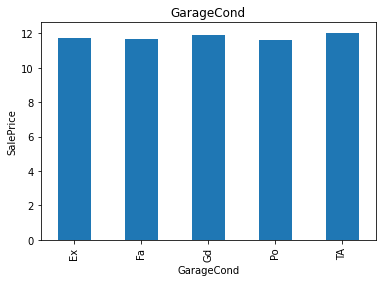

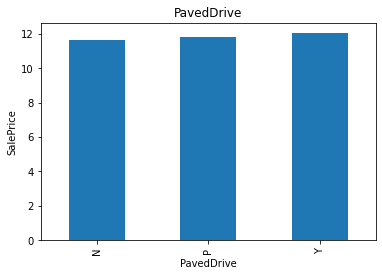

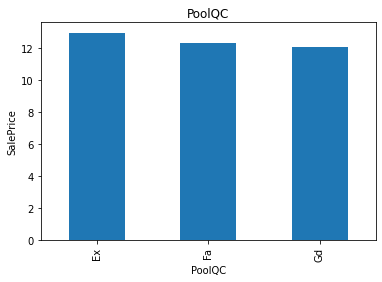

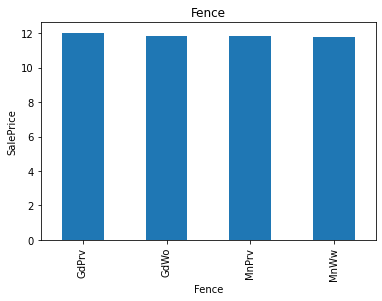

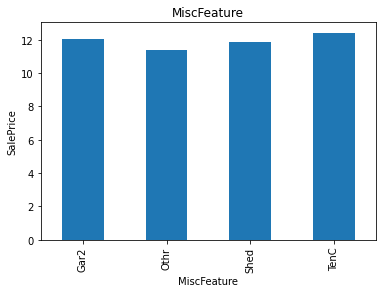

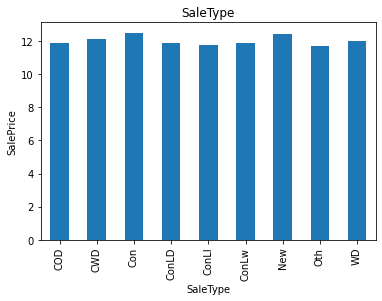

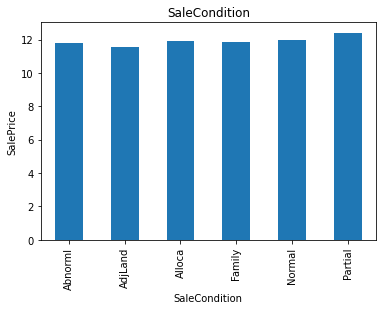

In [117]:
##Finding out the relation between categorical variable and Sale Price

for feature in categorical_features:
    dataset=data.copy()
    dataset.groupby(feature)['SalePrice'].median().plot.bar()
    plt.xlabel(feature)
    plt.ylabel('SalePrice')
    plt.title(feature)
    plt.show()

In [118]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(data,data['SalePrice'],test_size=0.1,random_state=40)

In [119]:
X_train.shape,X_test.shape

((1314, 81), (146, 81))

# Missing Values

In [142]:
#capturing all nan values
#Handling categorical features forst

features_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes=='O']

for feature in features_nan:
    print('{}: {}% missing values'.format(feature,np.round(X_train[feature].isnull().mean(),4)))

Alley: 0.9391% missing values
MasVnrType: 0.0053% missing values
BsmtQual: 0.0251% missing values
BsmtCond: 0.0251% missing values
BsmtExposure: 0.0259% missing values
BsmtFinType1: 0.0251% missing values
BsmtFinType2: 0.0259% missing values
FireplaceQu: 0.4612% missing values
GarageType: 0.0548% missing values
GarageFinish: 0.0548% missing values
GarageQual: 0.0548% missing values
GarageCond: 0.0548% missing values
PoolQC: 0.9954% missing values
Fence: 0.8029% missing values
MiscFeature: 0.9635% missing values


In [144]:
#Replace the missing value with a new label

def replace_cat_feature(X_train,features_nan):
    dataset=data.copy()
    dataset[features_nan]=dataset[features_nan].fillna('Missing')
    return dataset

data=replace_cat_feature(X_train,features_nan)

data[features_nan].isnull().sum()

Alley           0
MasVnrType      0
BsmtQual        0
BsmtCond        0
BsmtExposure    0
BsmtFinType1    0
BsmtFinType2    0
FireplaceQu     0
GarageType      0
GarageFinish    0
GarageQual      0
GarageCond      0
PoolQC          0
Fence           0
MiscFeature     0
dtype: int64

In [145]:
X_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
79,80,50,RM,4.094345,9.253400,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,99,28,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,440,440,GasA,Gd,Y,SBrkr,6.525030,548,0,7.114769,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,43.0,Unf,2,440,TA,TA,Y,74,0,128,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,11.608236
28,29,20,RL,3.850148,9.700208,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,49,9,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,1277,Unf,0,207,1484,GasA,TA,Y,SBrkr,7.377759,0,0,7.377759,1,0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,49.0,RFn,1,319,TA,TA,Y,288,258,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,12.242887
675,676,160,RL,3.178054,7.735870,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,31,31,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,311,Unf,0,544,855,GasA,TA,Y,SBrkr,6.751101,586,0,7.273093,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,31.0,Unf,2,440,TA,TA,Y,28,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,11.908340
388,389,20,RL,4.532599,9.146548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,9,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1468,1468,GasA,Ex,Y,SBrkr,7.299121,0,0,7.299121,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,9.0,RFn,2,577,TA,TA,Y,120,25,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,12.160029
669,670,30,RL,4.382027,9.358760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,84,56,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,700,700,GasA,Ex,Y,SBrkr,7.073270,0,0,7.073270,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,84.0,Unf,1,252,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,11.831379
1168,1169,70,RL,4.787492,9.527193,Pave,NaN,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,73,22,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,626,Unf,0,501,1127,GasA,Ex,Y,SBrkr,7.119636,872,0,7.653495,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,73.0,Unf,2,540,TA,TA,Y,0,0,0,0,90,0,NaN,NaN,NaN,0,7,2008,WD,Normal,12.367341
834,835,20,RL,4.317488,8.971448,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,47,47,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,TA,TA,CBlock,TA,TA,No,Rec,572,Unf,0,572,1144,GasA,Gd,Y,SBrkr,7.042286,0,0,7.042286,1,0,1,0,3,1,TA,6,Typ,0,NaN,Attchd,47.0,Unf,2,456,TA,TA,Y,0,0,0,0,0,0,NaN,GdWo,NaN,0,9,2008,WD,Normal,11.849040
1303,1304,20,RL,4.290459,9.069698,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,1,1,Gable,CompShg,VinylSd,VinylSd,BrkFace,228.0,Gd,TA,PConc,Gd,TA,Av,Unf,0,Unf,0,1616,1616,GasA,Ex,Y,SBrkr,7.387709,0,0,7.387709,0,0,2,0,3,1,Gd,7,Typ,0,NaN,Attchd,1.0,RFn,3,834,TA,TA,Y,208,59,0,0,0,0,NaN,NaN,NaN,0,4,2006,WD,Normal,12.354493
487,488,20,RL,4.248495,9.412710,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,NWAmes,Norm,Norm,1Fam,1Story,5,6,36,36,Gable,CompShg,Plywood,Plywood,None,0.0,TA,TA,CBlock,Gd,TA,Av,ALQ,998,Unf,0,486,1484,GasA,Gd,Y,SBrkr,7.302496,0,0,7.302496,0,0,2,0,3,1,TA,7,Typ,1,TA,Attchd,36.0,Unf,2,487,TA,TA,Y,224,0,0,0,180,0,NaN,NaN,NaN,0,2,2007,WD,Normal,12.072541
1282,1283,20,RL,4.110874,9.082507,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,Collg

In [146]:
## checking the numerical variables that contains missing values

numerical_with_nan=[feature for feature in X_train.columns if X_train[feature].isnull().sum()>1 and X_train[feature].dtypes!='O']

for feature in numerical_with_nan:
    print('{}: {}% missing value'.format(feature,np.round(X_train[feature].isnull().mean(),4)))

LotFrontage: 0.1773% missing value
MasVnrArea: 0.0053% missing value
GarageYrBlt: 0.0548% missing value


In [147]:
##Replacing the numerical missing values

for feature in numerical_with_nan:
    #we will replace by using median since there are outliers
    median_value=X_train[feature].median()
    
    ##creatw a new feature to capture nan values
    X_train[feature+'nan']=np.where(X_train[feature].isnull(),1,0)
    X_train[feature].fillna(median_value,inplace=True)
    
X_train[numerical_with_nan].isnull().sum()

LotFrontage    0
MasVnrArea     0
GarageYrBlt    0
dtype: int64

In [148]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,RM,4.094345,9.253400,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,99,28,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,440,440,GasA,Gd,Y,SBrkr,6.525030,548,0,7.114769,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,43.0,Unf,2,440,TA,TA,Y,74,0,128,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,11.608236,0,0,0
28,29,20,RL,3.850148,9.700208,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,49,9,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,1277,Unf,0,207,1484,GasA,TA,Y,SBrkr,7.377759,0,0,7.377759,1,0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,49.0,RFn,1,319,TA,TA,Y,288,258,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,12.242887,0,0,0
675,676,160,RL,3.178054,7.735870,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,31,31,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,311,Unf,0,544,855,GasA,TA,Y,SBrkr,6.751101,586,0,7.273093,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,31.0,Unf,2,440,TA,TA,Y,28,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,11.908340,0,0,0
388,389,20,RL,4.532599,9.146548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,9,8,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1468,1468,GasA,Ex,Y,SBrkr,7.299121,0,0,7.299121,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,9.0,RFn,2,577,TA,TA,Y,120,25,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,12.160029,0,0,0
669,670,30,RL,4.382027,9.358760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,84,56,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,700,700,GasA,Ex,Y,SBrkr,7.073270,0,0,7.073270,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,84.0,Unf,1,252,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,11.831379,0,0,0


In [149]:
#temporal variables(Date Time Variables)

for feature in ['YearBuilt','YearRemodAdd','GarageYrBlt']:
    X_train[feature]=X_train['YrSold']- X_train[feature]

In [151]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,RM,4.094345,9.253400,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,1910,1981,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,0,Unf,0,440,440,GasA,Gd,Y,SBrkr,6.525030,548,0,7.114769,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1966.0,Unf,2,440,TA,TA,Y,74,0,128,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,11.608236,0,0,0
28,29,20,RL,3.850148,9.700208,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,1277,Unf,0,207,1484,GasA,TA,Y,SBrkr,7.377759,0,0,7.377759,1,0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,1,319,TA,TA,Y,288,258,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,12.242887,0,0,0
675,676,160,RL,3.178054,7.735870,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1978,1978,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,311,Unf,0,544,855,GasA,TA,Y,SBrkr,6.751101,586,0,7.273093,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,Unf,2,440,TA,TA,Y,28,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,11.908340,0,0,0
388,389,20,RL,4.532599,9.146548,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,0,Unf,0,1468,1468,GasA,Ex,Y,SBrkr,7.299121,0,0,7.299121,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,577,TA,TA,Y,120,25,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,12.160029,0,0,0
669,670,30,RL,4.382027,9.358760,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,0,Unf,0,700,700,GasA,Ex,Y,SBrkr,7.073270,0,0,7.073270,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,1922.0,Unf,1,252,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,11.831379,0,0,0


In [152]:
num_features=['LotFrontage','LotArea','1stFlrSF','GrLivArea','SalePrice','GarageArea','2ndFlrSF','TotalBsmtSF','BsmtUnfSF','BsmtFinSF1']

for feature in num_features:
    X_train[feature]=np.log(X_train[feature])

C:\Users\ayans\Anaconda3\lib\site-packages\pandas\core\series.py:726: RuntimeWarning: divide by zero encountered in log
  result = getattr(ufunc, method)(*inputs, **kwargs)


In [153]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,RM,1.409607,2.224991,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,1910,1981,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,-inf,Unf,0,6.086775,6.086775,GasA,Gd,Y,SBrkr,1.875645,6.306275,0,1.962173,0,0,1,1,2,1,TA,5,Typ,0,NaN,Detchd,1966.0,Unf,2,6.086775,TA,TA,Y,74,0,128,0,0,0,NaN,MnPrv,NaN,0,5,2009,WD,Normal,2.451715,0,0,0
28,29,20,RL,1.348111,2.272147,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,7.152269,Unf,0,5.332719,7.302496,GasA,TA,Y,SBrkr,1.998470,-inf,0,1.998470,1,0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,1,5.765191,TA,TA,Y,288,258,0,0,0,0,NaN,NaN,NaN,0,12,2006,WD,Normal,2.504945,0,0,0
675,676,160,RL,1.156269,2.045868,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,NPkVill,Norm,Norm,Twnhs,2Story,6,6,1978,1978,Gable,CompShg,Plywood,Brk Cmn,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,5.739793,Unf,0,6.298949,6.751101,GasA,TA,Y,SBrkr,1.909706,6.373320,0,1.984182,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,Unf,2,6.086775,TA,TA,Y,28,0,0,0,0,0,NaN,NaN,NaN,0,4,2009,WD,Normal,2.477239,0,0,0
388,389,20,RL,1.511296,2.213377,Pave,NaN,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,-inf,Unf,0,7.291656,7.291656,GasA,Ex,Y,SBrkr,1.987754,-inf,0,1.987754,0,0,2,0,3,1,Gd,6,Typ,0,NaN,Attchd,1999.0,RFn,2,6.357842,TA,TA,Y,120,25,0,0,0,0,NaN,NaN,NaN,0,7,2008,WD,Normal,2.498154,0,0,0
669,670,30,RL,1.477511,2.236313,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,-inf,Unf,0,6.551080,6.551080,GasA,Ex,Y,SBrkr,1.956323,-inf,0,1.956323,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,1922.0,Unf,1,5.529429,TA,Fa,Y,0,0,67,0,0,0,NaN,NaN,NaN,0,7,2006,WD,Normal,2.470755,0,0,0


# Handling Rare categorical Feature

In [154]:
categorical_feature=[feature for feature in X_train.columns if X_train[feature].dtypes=='O']

In [155]:
categorical_feature

['MSZoning',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinType2',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 'KitchenQual',
 'Functional',
 'FireplaceQu',
 'GarageType',
 'GarageFinish',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'PoolQC',
 'Fence',
 'MiscFeature',
 'SaleType',
 'SaleCondition']

In [156]:
for feature in categorical_feature:
    temp=X_train.groupby(feature)['SalePrice'].count()/len(X_train)
    temp_df=temp[temp>0.01].index
    X_train[feature]=np.where(X_train[feature].isin(temp_df),X_train[feature],'Rare_var')

In [157]:
X_train.head(50)

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,RM,1.409607,2.224991,Pave,Grvl,Reg,Lvl,AllPub,Corner,Gtl,OldTown,Norm,Norm,1Fam,2Story,5,6,1910,1981,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,No,Unf,-inf,Unf,0,6.086775,6.086775,GasA,Gd,Y,SBrkr,1.875645,6.306275,0,1.962173,0,0,1,1,2,1,TA,5,Typ,0,Rare_var,Detchd,1966.0,Unf,2,6.086775,TA,TA,Y,74,0,128,0,0,0,Rare_var,MnPrv,Rare_var,0,5,2009,WD,Normal,2.451715,0,0,0
28,29,20,RL,1.348111,2.272147,Pave,Rare_var,IR1,Lvl,AllPub,CulDSac,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1957,1997,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,TA,TA,Gd,BLQ,7.152269,Unf,0,5.332719,7.302496,GasA,TA,Y,SBrkr,1.998470,-inf,0,1.998470,1,0,1,0,2,1,TA,6,Typ,2,Gd,Attchd,1957.0,RFn,1,5.765191,TA,TA,Y,288,258,0,0,0,0,Rare_var,Rare_var,Rare_var,0,12,2006,WD,Normal,2.504945,0,0,0
675,676,160,RL,1.156269,2.045868,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,Rare_var,Norm,Norm,Twnhs,2Story,6,6,1978,1978,Gable,CompShg,Plywood,Rare_var,None,0.0,TA,TA,CBlock,TA,TA,No,ALQ,5.739793,Unf,0,6.298949,6.751101,GasA,TA,Y,SBrkr,1.909706,6.373320,0,1.984182,0,0,2,1,3,1,TA,7,Typ,1,TA,Attchd,1978.0,Unf,2,6.086775,TA,TA,Y,28,0,0,0,0,0,Rare_var,Rare_var,Rare_var,0,4,2009,WD,Normal,2.477239,0,0,0
388,389,20,RL,1.511296,2.213377,Pave,Rare_var,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,1Fam,1Story,7,5,1999,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,125.0,Gd,TA,PConc,Gd,TA,No,Unf,-inf,Unf,0,7.291656,7.291656,GasA,Ex,Y,SBrkr,1.987754,-inf,0,1.987754,0,0,2,0,3,1,Gd,6,Typ,0,Rare_var,Attchd,1999.0,RFn,2,6.357842,TA,TA,Y,120,25,0,0,0,0,Rare_var,Rare_var,Rare_var,0,7,2008,WD,Normal,2.498154,0,0,0
669,670,30,RL,1.477511,2.236313,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,Crawfor,Norm,Norm,1Fam,1Story,4,5,1922,1950,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,BrkTil,Fa,TA,No,Unf,-inf,Unf,0,6.551080,6.551080,GasA,Ex,Y,SBrkr,1.956323,-inf,0,1.956323,0,0,1,0,2,1,Fa,5,Typ,1,Gd,Detchd,1922.0,Unf,1,5.529429,TA,Fa,Y,0,0,67,0,0,0,Rare_var,Rare_var,Rare_var,0,7,2006,WD,Normal,2.470755,0,0,0
1168,1169,70,RL,1.566007,2.254150,Pave,Rare_var,Reg,Lvl,AllPub,Corner,Gtl,Edwards,Norm,Norm,1Fam,2Story,6,7,1935,1986,Hip,CompShg,Stucco,Stucco,None,0.0,TA,TA,CBlock,TA,TA,No,Rec,6.439350,Unf,0,6.216606,7.027315,GasA,Ex,Y,SBrkr,1.962857,6.770789,0,2.035162,0,0,2,0,4,1,Gd,7,Typ,2,TA,Basment,1935.0,Unf,2,6.291569,TA,TA,Y,0,0,0,0,90,0,Rare_var,Rare_var,Rare_var,0,7,2008,WD,Normal,2.515059,0,0,0
834,835,20,RL,1.462674,2.194047,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,NAmes,Norm,Norm,1Fam,1Story,5,6,1961,1961,Gable,CompShg,VinylSd,VinylSd,BrkFace,136.0,TA,TA,CBlock,TA,TA,No,Rec,6.349139,Unf,0,6.349139,7.042286,GasA,Gd,Y,SBrkr,1.951933,-inf,0,1.951933,1,0,1,0,3,1,TA,6,Typ,0,Rare_var,Attchd,1961.0,Unf,2,6.122493,TA,TA,Y,0,0,0,0,0,0,Rare_var,GdWo,Rare_var,0,9,2008,WD,Normal,2.472247,0,0,0
1303,1304,20,RL,1.456394,2.204939,Pave,Rare_var,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2005,2005,Gable,CompShg,VinylSd,VinylSd,BrkFace,228.0,Gd,TA,PConc,Gd,TA,Av,Unf,-inf,Unf,0,7.387709,7.387709,GasA,Ex,Y,SBrkr,1.999818,-inf,0,1.999818,0,0,2,0,3,1,Gd,7,Typ,0,Rare_var,Attchd,2005.0,RFn,3,6.726233,TA,TA,Y,208,59,0,0,

In [158]:
for feature in categorical_feature:
    labels_ordered=X_train.groupby([feature])['SalePrice'].mean().sort_values().index
    labels_ordered={k:i for i,k in enumerate(labels_ordered,0)}
    X_train[feature]=X_train[feature].map(labels_ordered)

In [159]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,1,1.409607,2.224991,1,0,0,1,1,1,0,4,2,1,4,5,5,6,1910,1981,0,0,3,2,1,0.0,1,3,4,2,2,1,5,-inf,4,0,6.086775,6.086775,2,2,1,3,1.875645,6.306275,0,1.962173,0,0,1,1,2,1,1,5,4,0,1,1,1966.0,1,2,6.086775,2,2,2,74,0,128,0,0,0,0,1,1,0,5,2009,2,3,2.451715,0,0,0
28,29,20,3,1.348111,2.272147,1,2,1,1,1,4,0,8,2,1,4,3,5,6,1957,1997,0,0,5,3,1,0.0,1,3,2,2,2,4,2,7.152269,4,0,5.332719,7.302496,2,1,1,3,1.998470,-inf,0,1.998470,1,0,1,0,2,1,1,6,4,2,4,3,1957.0,2,1,5.765191,2,2,2,288,258,0,0,0,0,0,2,1,0,12,2006,2,3,2.504945,0,0,0
675,676,160,3,1.156269,2.045868,1,2,0,1,1,0,0,10,2,1,1,5,6,6,1978,1978,0,0,7,5,1,0.0,1,3,2,2,2,1,4,5.739793,4,0,6.298949,6.751101,2,1,1,3,1.909706,6.373320,0,1.984182,0,0,2,1,3,1,1,7,4,1,3,3,1978.0,1,2,6.086775,2,2,2,28,0,0,0,0,0,0,2,1,0,4,2009,2,3,2.477239,0,0,0
388,389,20,3,1.511296,2.213377,1,2,1,1,1,4,0,14,2,1,4,3,7,5,1999,2000,0,0,10,10,2,125.0,2,3,4,3,2,1,5,-inf,4,0,7.291656,7.291656,2,3,1,3,1.987754,-inf,0,1.987754,0,0,2,0,3,1,2,6,4,0,1,3,1999.0,2,2,6.357842,2,2,2,120,25,0,0,0,0,0,2,1,0,7,2008,2,3,2.498154,0,0,0
669,670,30,3,1.477511,2.236313,1,2,0,1,1,0,0,16,2,1,4,3,4,5,1922,1950,0,0,5,3,1,0.0,1,3,1,1,2,1,5,-inf,4,0,6.551080,6.551080,2,3,1,3,1.956323,-inf,0,1.956323,0,0,1,0,2,1,0,5,4,1,4,1,1922.0,1,1,5.529429,2,1,2,0,0,67,0,0,0,0,2,1,0,7,2006,2,3,2.470755,0,0,0


In [160]:
scaling_feature=[feature for feature in X_train.columns if feature not in ['Id','SalePrice']]
len(scaling_feature)

82

In [161]:
scaling_feature

['MSSubClass',
 'MSZoning',
 'LotFrontage',
 'LotArea',
 'Street',
 'Alley',
 'LotShape',
 'LandContour',
 'Utilities',
 'LotConfig',
 'LandSlope',
 'Neighborhood',
 'Condition1',
 'Condition2',
 'BldgType',
 'HouseStyle',
 'OverallQual',
 'OverallCond',
 'YearBuilt',
 'YearRemodAdd',
 'RoofStyle',
 'RoofMatl',
 'Exterior1st',
 'Exterior2nd',
 'MasVnrType',
 'MasVnrArea',
 'ExterQual',
 'ExterCond',
 'Foundation',
 'BsmtQual',
 'BsmtCond',
 'BsmtExposure',
 'BsmtFinType1',
 'BsmtFinSF1',
 'BsmtFinType2',
 'BsmtFinSF2',
 'BsmtUnfSF',
 'TotalBsmtSF',
 'Heating',
 'HeatingQC',
 'CentralAir',
 'Electrical',
 '1stFlrSF',
 '2ndFlrSF',
 'LowQualFinSF',
 'GrLivArea',
 'BsmtFullBath',
 'BsmtHalfBath',
 'FullBath',
 'HalfBath',
 'BedroomAbvGr',
 'KitchenAbvGr',
 'KitchenQual',
 'TotRmsAbvGrd',
 'Functional',
 'Fireplaces',
 'FireplaceQu',
 'GarageType',
 'GarageYrBlt',
 'GarageFinish',
 'GarageCars',
 'GarageArea',
 'GarageQual',
 'GarageCond',
 'PavedDrive',
 'WoodDeckSF',
 'OpenPorchSF',
 'Enc

In [162]:
X_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
79,80,50,1,1.409607,2.224991,1,0,0,1,1,1,0,4,2,1,4,5,5,6,1910,1981,0,0,3,2,1,0.0,1,3,4,2,2,1,5,-inf,4,0,6.086775,6.086775,2,2,1,3,1.875645,6.306275,0,1.962173,0,0,1,1,2,1,1,5,4,0,1,1,1966.0,1,2,6.086775,2,2,2,74,0,128,0,0,0,0,1,1,0,5,2009,2,3,2.451715,0,0,0
28,29,20,3,1.348111,2.272147,1,2,1,1,1,4,0,8,2,1,4,3,5,6,1957,1997,0,0,5,3,1,0.0,1,3,2,2,2,4,2,7.152269,4,0,5.332719,7.302496,2,1,1,3,1.998470,-inf,0,1.998470,1,0,1,0,2,1,1,6,4,2,4,3,1957.0,2,1,5.765191,2,2,2,288,258,0,0,0,0,0,2,1,0,12,2006,2,3,2.504945,0,0,0
675,676,160,3,1.156269,2.045868,1,2,0,1,1,0,0,10,2,1,1,5,6,6,1978,1978,0,0,7,5,1,0.0,1,3,2,2,2,1,4,5.739793,4,0,6.298949,6.751101,2,1,1,3,1.909706,6.373320,0,1.984182,0,0,2,1,3,1,1,7,4,1,3,3,1978.0,1,2,6.086775,2,2,2,28,0,0,0,0,0,0,2,1,0,4,2009,2,3,2.477239,0,0,0
388,389,20,3,1.511296,2.213377,1,2,1,1,1,4,0,14,2,1,4,3,7,5,1999,2000,0,0,10,10,2,125.0,2,3,4,3,2,1,5,-inf,4,0,7.291656,7.291656,2,3,1,3,1.987754,-inf,0,1.987754,0,0,2,0,3,1,2,6,4,0,1,3,1999.0,2,2,6.357842,2,2,2,120,25,0,0,0,0,0,2,1,0,7,2008,2,3,2.498154,0,0,0
669,670,30,3,1.477511,2.236313,1,2,0,1,1,0,0,16,2,1,4,3,4,5,1922,1950,0,0,5,3,1,0.0,1,3,1,1,2,1,5,-inf,4,0,6.551080,6.551080,2,3,1,3,1.956323,-inf,0,1.956323,0,0,1,0,2,1,0,5,4,1,4,1,1922.0,1,1,5.529429,2,1,2,0,0,67,0,0,0,0,2,1,0,7,2006,2,3,2.470755,0,0,0


In [165]:
df =X_train[~X_train.isin([np.nan, np.inf, -np.inf]).any(1)]

In [166]:
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
675,676,160,3,1.156269,2.045868,1,2,0,1,1,0,0,10,2,1,1,5,6,6,1978,1978,0,0,7,5,1,0.0,1,3,2,2,2,1,4,5.739793,4,0,6.298949,6.751101,2,1,1,3,1.909706,6.373320,0,1.984182,0,0,2,1,3,1,1,7,4,1,3,3,1978.0,1,2,6.086775,2,2,2,28,0,0,0,0,0,0,2,1,0,4,2009,2,3,2.477239,0,0,0
1168,1169,70,3,1.566007,2.254150,1,2,0,1,1,1,0,5,2,1,4,5,6,7,1935,1986,2,0,1,1,1,0.0,1,3,2,2,2,1,1,6.439350,4,0,6.216606,7.027315,2,3,1,3,1.962857,6.770789,0,2.035162,0,0,2,0,4,1,2,7,4,2,3,2,1935.0,1,2,6.291569,2,2,2,0,0,0,0,90,0,0,2,1,0,7,2008,2,3,2.515059,0,0,0
152,153,60,3,1.443172,2.262032,1,2,1,1,1,4,0,12,2,1,4,5,6,5,1971,1971,0,0,6,6,2,252.0,1,3,2,2,2,1,1,6.030685,4,0,6.013715,6.715383,2,2,1,3,1.945958,6.797940,0,2.027806,0,0,2,1,4,1,1,8,4,1,4,3,1971.0,2,2,6.204558,2,2,2,0,66,0,0,0,0,0,0,1,0,6,2006,2,3,2.497722,1,0,0
1248,1249,75,1,1.409607,2.215885,1,0,0,1,1,0,0,4,2,1,4,2,6,5,1917,1950,0,0,0,0,1,0.0,1,3,1,3,2,1,1,5.765191,4,0,6.030685,6.599870,0,0,0,3,1.950685,6.828712,0,2.032021,0,0,1,1,3,1,1,8,4,1,4,1,1950.0,1,2,5.981414,1,1,1,0,0,259,0,0,0,0,2,1,0,4,2008,2,3,2.465676,0,0,0
414,415,60,3,1.405493,2.232824,1,2,3,1,1,4,0,11,2,1,4,5,7,5,1993,1993,0,0,10,10,1,0.0,2,3,4,3,2,1,2,3.912023,0,531,6.212606,6.984716,2,3,1,3,1.943724,6.924612,0,2.034479,0,1,2,1,3,1,2,9,4,1,3,3,1993.0,1,3,6.519147,2,2,2,196,187,0,0,0,0,0,2,1,0,12,2008,2,3,2.512611,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
500,501,160,1,1.113344,2.020797,1,2,0,1,1,0,0,2,2,1,1,5,6,5,1973,1973,0,0,6,6,2,285.0,1,3,2,2,2,1,2,5.874931,4,0,5.755742,6.510258,2,1,1,3,1.873379,6.302619,0,1.960794,0,0,1,1,3,1,1,7,4,0,1,1,1973.0,1,1,5.575949,2,2,2,144,28,0,0,0,0,0,2,1,0,5,2007,2,3,2.454030,0,0,0
1032,1033,60,3,1.443172,2.260171,1,2,1,1,1,1,0,22,2,1,4,5,8,7,1993,1993,0,0,5,3,1,0.0,2,2,4,3,3,1,6,6.919684,4,0,5.786897,7.198931,2,3,1,3,1.975377,7.063048,0,2.058220,1,0,2,1,5,1,2,10,4,1,3,3,1993.0,2,3,6.679599,2,2,2,209,55,0,0,0,0,0,2,1,0,11,2006,2,0,2.537209,1,0,0
1353,1354,50,3,1.392612,2.261447,1,2,1,1,1,4,0,22,2,1,4,1,8,5,1995,1996,2,0,10,10,2,579.0,2,3,4,3,2,3,6,6.704414,4,0,7.104144,7.617268,2,3,1,3,2.031702,7.077498,0,2.089727,1,0,2,1,4,1,2,9,4,1,5,3,1996.0,3,3,6.501290,2,2,2,283,86,0,0,0,0,0,2,1,0,3,2010,2,3,2.559079,0,0,0
7,8,60,3,1.443172,2.224389,1,2,1,1,1,1,0,12,5,1,4,5,7,6,1973,1973,0,0,6,6,4,240.0,1,3,2,3,2,2,4,6.755769,1,32,5.375278,7.009409,2,3,1,3,1.947253,6.890609,0,2.034041,1,0,2,1,3,1,1,7,4,2,3,3,1973.0,2,2,6.182085,2,2,2,235,204,228,0,0,0,0,2,0,350,11,2009,2,3,2.501934,1,0,0


# Feature Scaling

In [175]:
feature_scale=[feature for feature in df.columns if feature not in ['Id','SalePrice']]

from sklearn.preprocessing import MinMaxScaler
scaler=MinMaxScaler()
scaler.fit(df[feature_scale])

MinMaxScaler()

In [176]:
scaler.transform(df[feature_scale])

array([[0.82352941, 0.75      , 0.06757757, ..., 0.        , 0.        ,
        0.        ],
       [0.29411765, 0.75      , 0.71263531, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.51925493, ..., 1.        , 0.        ,
        0.        ],
       ...,
       [0.17647059, 0.75      , 0.43965729, ..., 0.        , 0.        ,
        0.        ],
       [0.23529412, 0.75      , 0.51925493, ..., 1.        , 0.        ,
        0.        ],
       [0.41176471, 0.75      , 0.61893355, ..., 0.        , 0.        ,
        0.        ]])

In [178]:
data_new=pd.concat([dataset[['Id','SalePrice']].reset_index(drop=True),
                   pd.DataFrame(scaler.transform(df[feature_scale]),columns=feature_scale)],
                  axis=1)

In [179]:
data_new

,Id,SalePrice,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,LotFrontagenan,MasVnrAreanan,GarageYrBltnan
0,1,12.247694,0.823529,0.75,0.067578,0.147195,1.0,1.0,0.000000,0.333333,0.0,0.00,0.0,0.454545,0.4,1.0,0.25,1.00,0.428571,0.500000,0.755906,0.474576,0.0,0.0,0.7,0.5,0.25,0.0000,0.333333,1.0,0.333333,0.333333,0.5,0.0,0.6,0.505852,0.8,0.000000,0.754317,0.297346,1.0,0.333333,1.0,1.0,0.282133,0.499157,0.0,0.268240,0.0,0.0,0.666667,0.5,0.500000,0.0,0.333333,0.375,1.0,0.333333,0.6,0.75,0.715596,0.0,0.333333,0.463648,1.0,1.0,1.0,0.038462,0.000000,0.000000,0.0,0.0000,0.0,0.0,0.666667,1.0,0.0,0.272727,0.75,0.666667,0.75,0.0,0.0,0.0
1,2,12.109011,0.294118,0.75,0.712635,0.550878,1.0,1.0,0.000000,0.333333,0.0,0.25,0.0,0.227273,0.4,1.0,1.00,1.00,0.428571,0.666667,0.417323,0.610169,1.0,0.0,0.1,0.1,0.25,0.0000,0.333333,1.0,0.333333,0.333333,0.5,0.0,0.0,0.625113,0.8,0.000000,0.737020,0.396036,1.0,1.000000,1.0,1.0,0.451796,0.657203,0.0,0.485148,0.0,0.0,0.666667,0.0,0.666667,0.0,0.666667,0.375,1.0,0.666667,0.6,0.50,0.321101,0.0,0.333333,0.557512,1.0,1.0,1.0,0.000000,0.000000,0.000000,0.0,0.1875,0.0,0.0,0.666667,1.0,0.0,0.545455,0.50,0.666667,0.75,0.0,0.0,0.0
2,3,12.317167,0.235294,0.75,0.519255,0.566156,1.0,1.0,0.333333,0.333333,0.0,1.00,0.0,0.545455,0.4,1.0,1.00,1.00,0.428571,0.333333,0.700787,0.355932,0.0,0.0,0.6,0.6,0.50,0.1575,0.333333,1.0,0.333333,0.333333,0.5,0.0,0.0,0.555443,0.8,0.000000,0.694400,0.284584,1.0,0.666667,1.0,1.0,0.397854,0.668000,0.0,0.453847,0.0,0.0,0.666667,0.5,0.666667,0.0,0.333333,0.500,1.0,0.333333,0.8,0.75,0.651376,0.5,0.333333,0.517632,1.0,1.0,1.0,0.000000,0.120658,0.000000,0.0,0.0000,0.0,0.0,0.000000,1.0,0.0,0.454545,0.00,0.666667,0.75,1.0,0.0,0.0
3,4,11.849398,0.323529,0.25,0.466412,0.476714,1.0,0.0,0.000000,0.333333,0.0,0.00,0.0,0.181818,0.4,1.0,1.00,0.25,0.428571,0.333333,0.275591,0.000000,0.0,0.0,0.0,0.0,0.25,0.0000,0.333333,1.0,0.000000,0.666667,0.5,0.0,0.0,0.510182,0.8,0.000000,0.697965,0.243311,0.0,0.000000,0.0,1.0,0.412944,0.680235,0.0,0.471782,0.0,0.0,0.333333,0.5,0.500000,0.0,0.333333,0.500,1.0,0.333333,0.8,0.25,0.458716,0.0,0.333333,0.415358,0.5,0.5,0.5,0.000000,0.000000,0.469203,0.0,0.0000,0.0,0.0,0.666667,1.0,0.0,0.272727,0.50,0.666667,0.75,0.0,0.0,0.0
4,5,12.429216,0.235294,0.75,0.459936,0.509545,1.0,1.0,1.000000,0.333333,0.0,1.00,0.0,0.500000,0.4,1.0,1.00,1.00,0.571429,0.333333,0.874016,0.728814,0.0,0.0,1.0,1.0,0.25,0.0000,0.666667,1.0,1.000000,0.666667,0.5,0.0,0.2,0.194252,0.0,0.515034,0.736180,0.380816,1.0,1.000000,1.0,1.0,0.390724,0.718368,0.0,0.482238,0.0,1.0,0.666667,0.5,0.500000,0.0,0.666667,0.625,1.0,0.333333,0.6,0.75,0.853211,0.0,0.666667,0.661818,1.0,1.0,1.0,0.269231,0.341865,0.000000,0.0,0.0000,0.0,0.0,0.666667,1.0,0.0,1.000000,0.50,0.666667,0.75,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,12.072541,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,

In [180]:
data.to_csv('X_train.csv',index=False)